### Plotting distribution against Categories

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set SeaBorn Style as per your taste

sns.set_style("whitegrid")
market_df= pd.read_csv("D:/upgrad/datasets/market_fact.csv")
custdimen_df = pd.read_csv("D:/upgrad/datasets/cust_dimen.csv")
ordersdimen_df = pd.read_csv("D:/upgrad/datasets/orders_dimen.csv")
prod_df = pd.read_csv("D:/upgrad/datasets/prod_dimen.csv")
shipping_df = pd.read_csv("D:/upgrad/datasets/shipping_dimen.csv")
prod_df.columns
market_df.columns
custdimen_df.columns

Index(['Customer_Name', 'Province', 'Region', 'Customer_Segment', 'Cust_id'], dtype='object')

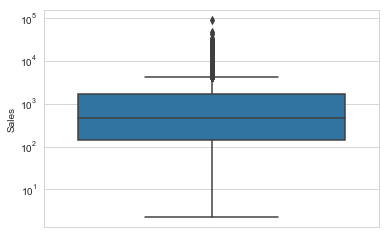

In [3]:
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')
plt.show()

In [10]:
#merge the market_df and prod_df to add a categorical variable

df_mp = pd.merge(market_df, prod_df, how="inner", on="Prod_id")
df_mp.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


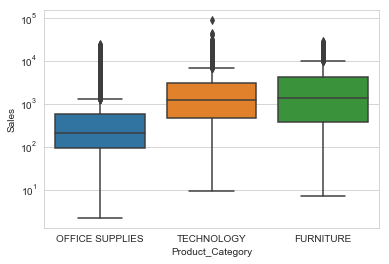

In [12]:
#Boxplot office category against sales with x axis will take the product category and y axis the log 
sns.boxplot(x='Product_Category', y='Sales', data=df_mp)
plt.yscale('log')
plt.show()

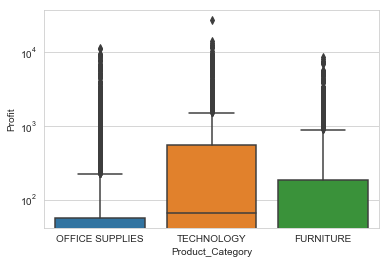

In [17]:
#Boxplot ProductCategory against x axis and profit on the y axis.
sns.boxplot(x='Product_Category', y='Profit', data=df_mp)
plt.yscale('log')
plt.show()

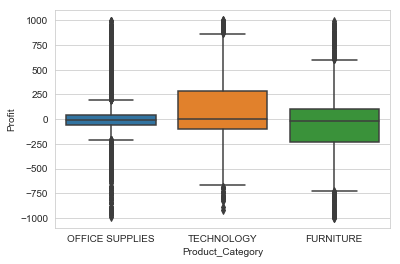

In [18]:
#Box plot only those points where the profit is < 1000 and >-1000
df_filtered = df_mp[(df_mp.Profit<1000) & (df_mp.Profit > -1000)]
sns.boxplot(x='Product_Category', y='Profit', data=df_filtered)
plt.show()

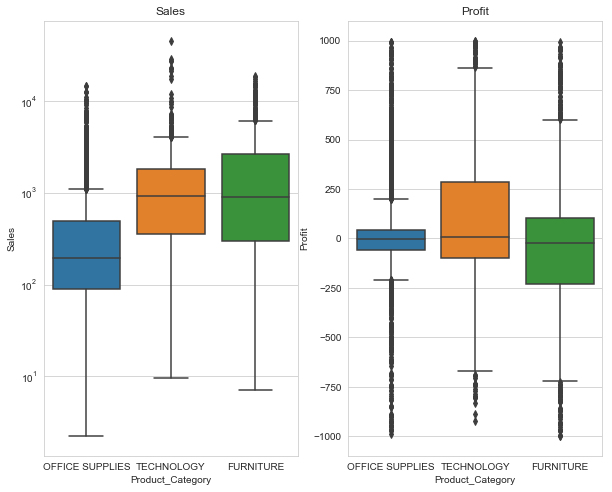

In [23]:
# Plotting both the sales and profit together in the same figure

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.title('Sales')
sns.boxplot(x='Product_Category', y="Sales", data=df_filtered)
plt.yscale('log')

plt.subplot(1,2,2)
plt.title('Profit')
sns.boxplot(x='Product_Category', y='Profit', data=df_filtered)

plt.show()



In [27]:
#Merge the df_filtered with the cust_df 

df = pd.merge(df_filtered,custdimen_df,how='inner', on='Cust_id' )
df.columns
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE


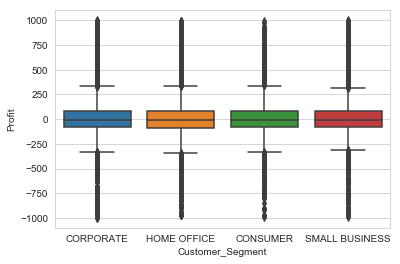

In [29]:
# Boxplot x= Customer Segment and Y=Profit

sns.boxplot(x='Customer_Segment', y='Profit', data=df)
plt.show()

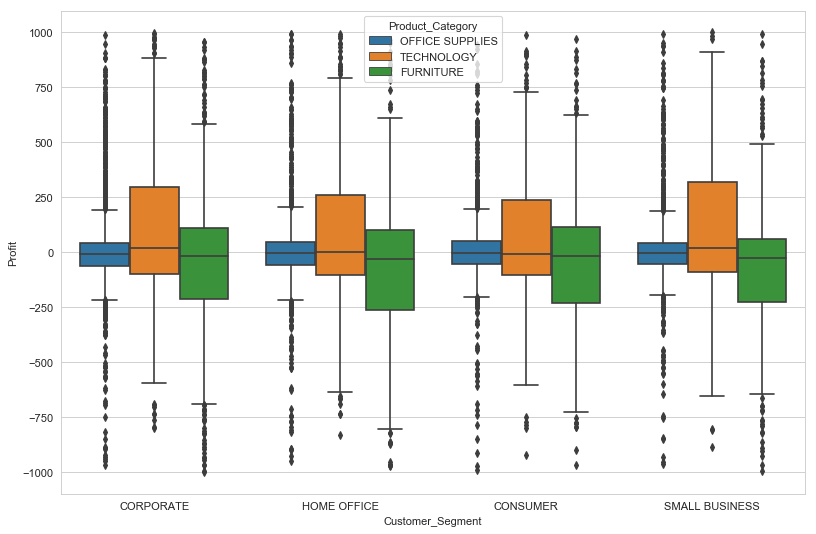

In [33]:
#set the figure size for a large figure as below

plt.figure(num=None,figsize=(12,8), dpi=80, facecolor='w', edgecolor='k' )
df.columns
sns.boxplot(x='Customer_Segment', y='Profit', hue='Product_Category', data=df)
plt.show()

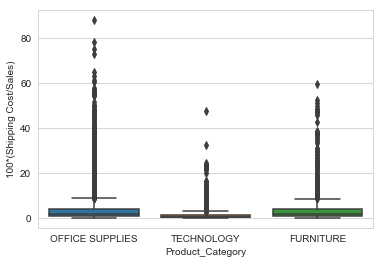

In [36]:
# Can create synthetic columns on the fly as below

sns.boxplot(x=df['Product_Category'], y=100*df['Shipping_Cost']/df['Sales'], data=df)
plt.ylabel("100*(Shipping Cost/Sales)")


plt.show()

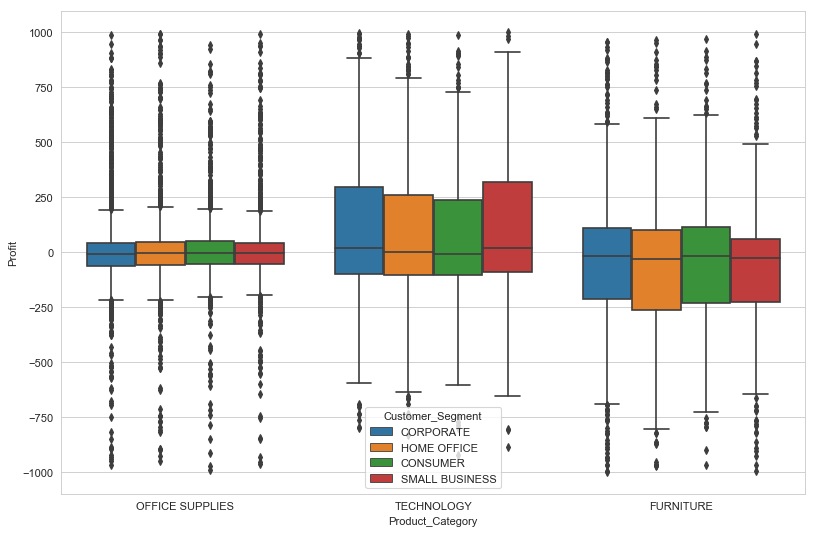

In [38]:
#set the figure size for a large figure as below

plt.figure(num=None,figsize=(12,8), dpi=80, facecolor='w', edgecolor='k' )
df.columns
sns.boxplot(x='Product_Category', y='Profit', hue='Customer_Segment', data=df)
plt.show()

### Plotting Aggregate Values Across Categories
<p>how to visualise statistical aggregates for categories. Also, you can see how you can change the type of aggregated metric while visualising the plot.</p>

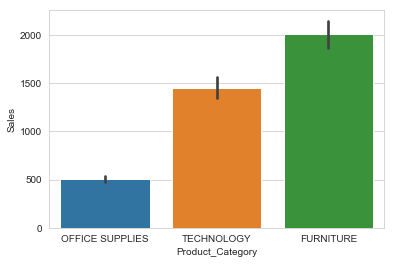

In [41]:
df.head()

sns.barplot(x='Product_Category', y='Sales', data=df)
plt.show()

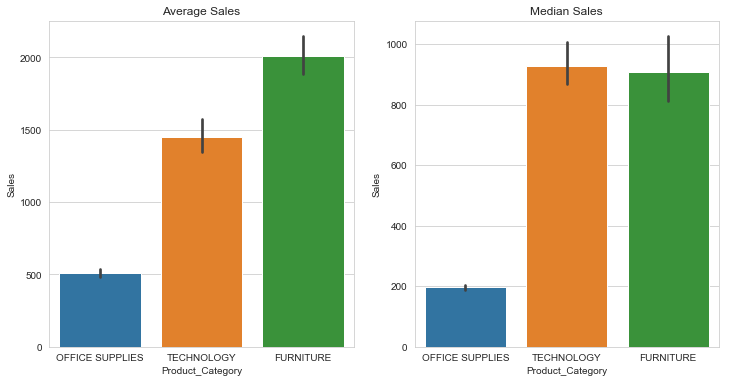

In [43]:
plt.figure(figsize=(12,6))
#subplot for the statistical mean
plt.subplot(1,2,1)
sns.barplot(x='Product_Category', y='Sales', data=df)
plt.title("Average Sales")
plt.subplot(1,2,2)
sns.barplot(x='Product_Category', y='Sales', estimator=np.median, data=df)
plt.title("Median Sales")

plt.show()

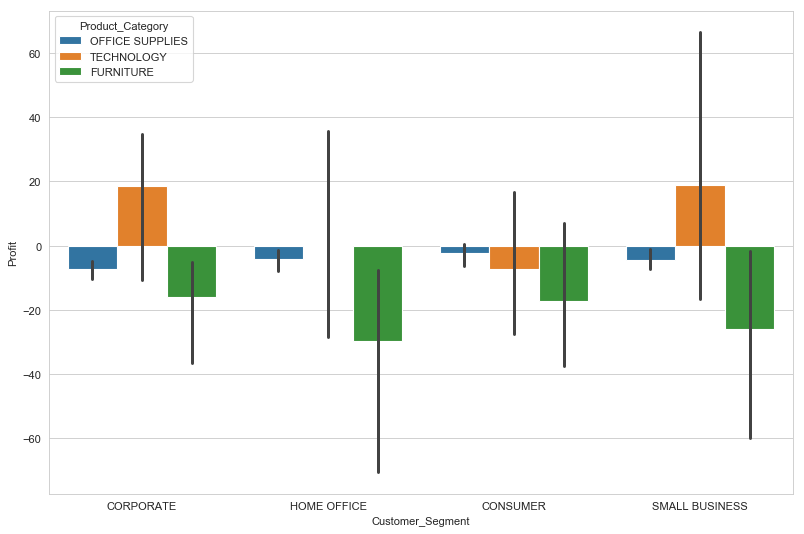

In [46]:
#Categorical Data

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')

# specify hue as productcategory

sns.barplot(x='Customer_Segment', y='Profit', hue='Product_Category',data=df, estimator=np.median)

plt.show()

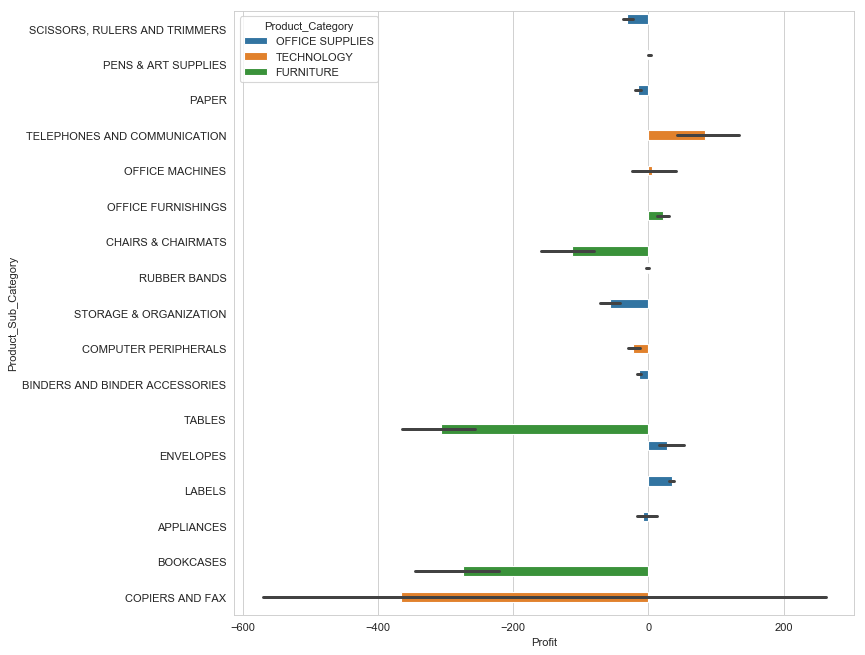

In [49]:
plt.figure(num=None, figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='Profit', y='Product_Sub_Category', hue='Product_Category', data=df, estimator=np.median)
plt.show()

In [51]:
df['Profit'].median()

-5.92

In [56]:
test1 =df['Profit']-df['Profit'].mean()
print(test1)

0       -51.122798
1       -16.052798
2       708.727202
3       -68.252798
4         2.507202
5       -38.192798
6      -141.542798
7      -113.872798
8      -150.182798
9      -157.432798
10     -813.972798
11       40.957202
12      -35.602798
13      -88.322798
14      -99.252798
15      317.397202
16      -34.142798
17       10.357202
18      -59.182798
19      -35.812798
20      -23.792798
21      -45.492798
22      -18.592798
23       47.097202
24       -9.792798
25      264.737202
26      -24.572798
27      -19.162798
28       40.387202
29      -92.572798
           ...    
7473   -136.822798
7474    117.487202
7475   -119.632798
7476    -79.422798
7477    412.977202
7478    -45.922798
7479    711.107202
7480   -580.392798
7481    175.747202
7482    -37.642798
7483    399.437202
7484    232.047202
7485    355.857202
7486   -181.332798
7487    -90.452798
7488    791.707202
7489   -121.102798
7490    189.397202
7491   -151.642798
7492    896.667202
7493    210.847202
7494    -80.

In [53]:
test = df['Product_Category'].value_counts()
print(test)

OFFICE SUPPLIES    4393
TECHNOLOGY         1675
FURNITURE          1435
Name: Product_Category, dtype: int64
